**Jeonghun Kim, 2017112066, assigment1**

[1] Named Entity Recognition
 
+ Task of identifying proper names in the text and classifying into set of
   predefined categories of interest
   
+ An entity is a discrete thing like “IBM Corporation”

+ our perpose is to find NN(NNP) and classify into PERSON / ORGANIZATION / 
    GPE(location)
***
*usual tags

  'DT'	determiner	/ the
  
  'IN'	preposition, subordinating conjunction	/ in, of, like
  
  'NN'	noun, singular or mass	/ table
  
  'NP'	proper noun, singular	/ John ('NNP')
  
  'PP'	personal pronoun	/ I, he, it('PRP')
  
  'V~'  verbs  /  	take('VV'), took('VVD'), taking('VVG'), taken('VVN'), ...
 ***

In [16]:
from nltk import word_tokenize, pos_tag, ne_chunk

In [17]:
# [1]
sentence = "Steve Jobs was an American entrepreneur and business magnate. He was the chairman, chief executive officer (CEO), and a co-founder of Apple Inc., chairman and majority shareholder of Pixar, a member of The Walt Disney Company's board of directors following its acquisition of Pixar, and the founder, chairman, and CEO of NeXT. Jobs is widely recognized as a pioneer of the microcomputer revolution of the 1970s and 1980s, along with Apple co-founder Steve Wozniak. "

tokenized_sentence = pos_tag(word_tokenize(sentence))
print(tokenized_sentence)

ner_sentence = ne_chunk(tokenized_sentence)
print(ner_sentence)

[('Steve', 'NNP'), ('Jobs', 'NNP'), ('was', 'VBD'), ('an', 'DT'), ('American', 'JJ'), ('entrepreneur', 'NN'), ('and', 'CC'), ('business', 'NN'), ('magnate', 'NN'), ('.', '.'), ('He', 'PRP'), ('was', 'VBD'), ('the', 'DT'), ('chairman', 'NN'), (',', ','), ('chief', 'JJ'), ('executive', 'NN'), ('officer', 'NN'), ('(', '('), ('CEO', 'NNP'), (')', ')'), (',', ','), ('and', 'CC'), ('a', 'DT'), ('co-founder', 'NN'), ('of', 'IN'), ('Apple', 'NNP'), ('Inc.', 'NNP'), (',', ','), ('chairman', 'NN'), ('and', 'CC'), ('majority', 'NN'), ('shareholder', 'NN'), ('of', 'IN'), ('Pixar', 'NNP'), (',', ','), ('a', 'DT'), ('member', 'NN'), ('of', 'IN'), ('The', 'DT'), ('Walt', 'NNP'), ('Disney', 'NNP'), ('Company', 'NNP'), ("'s", 'POS'), ('board', 'NN'), ('of', 'IN'), ('directors', 'NNS'), ('following', 'VBG'), ('its', 'PRP$'), ('acquisition', 'NN'), ('of', 'IN'), ('Pixar', 'NNP'), (',', ','), ('and', 'CC'), ('the', 'DT'), ('founder', 'NN'), (',', ','), ('chairman', 'NN'), (',', ','), ('and', 'CC'), ('CEO'

[2] Extract all bigrams, trigrams using ngrams of nltk library

+ N-gram can be applied to word prediction, analyzing connection of n-gram words.

In [18]:
#[2]

from nltk import ngrams
sentence = "Machine learning is a necessary field in today's world. Data science can do wonders. Natural Language Processing is how machines understand text"

bigram = ngrams(sentence.split(), 2)
print("***BIGRAM***")
print(list(zip(bigram)))

trigram = ngrams(sentence.split(), 3)
print("")
print("***TRIGRAM***")
print(list(zip(trigram)))


***BIGRAM***
[(('Machine', 'learning'),), (('learning', 'is'),), (('is', 'a'),), (('a', 'necessary'),), (('necessary', 'field'),), (('field', 'in'),), (('in', "today's"),), (("today's", 'world.'),), (('world.', 'Data'),), (('Data', 'science'),), (('science', 'can'),), (('can', 'do'),), (('do', 'wonders.'),), (('wonders.', 'Natural'),), (('Natural', 'Language'),), (('Language', 'Processing'),), (('Processing', 'is'),), (('is', 'how'),), (('how', 'machines'),), (('machines', 'understand'),), (('understand', 'text'),)]

***TRIGRAM***
[(('Machine', 'learning', 'is'),), (('learning', 'is', 'a'),), (('is', 'a', 'necessary'),), (('a', 'necessary', 'field'),), (('necessary', 'field', 'in'),), (('field', 'in', "today's"),), (('in', "today's", 'world.'),), (("today's", 'world.', 'Data'),), (('world.', 'Data', 'science'),), (('Data', 'science', 'can'),), (('science', 'can', 'do'),), (('can', 'do', 'wonders.'),), (('do', 'wonders.', 'Natural'),), (('wonders.', 'Natural', 'Language'),), (('Natural'

[3] Sentiment analysis

+ Find expressed semotion of text, like positive, negative or neural, then determine polarity scores of sentences.

+ It is commonly used to analyze customer feedback, survey responses, and product reviews.



In [19]:
#[3]

from nltk.sentiment.vader import SentimentIntensityAnalyzer

text_list = ["We are happy!",
"Today I am Happy",
"The best life ever",
"I am sad",
"We are sad",
"We are super sad",
"We are all so sad today"]

for i in range (0,7):
    print(text_list[i],"\n", SentimentIntensityAnalyzer().polarity_scores(text_list[i]))


We are happy! 
 {'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6114}
Today I am Happy 
 {'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'compound': 0.5719}
The best life ever 
 {'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.6369}
I am sad 
 {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}
We are sad 
 {'neg': 0.608, 'neu': 0.392, 'pos': 0.0, 'compound': -0.4767}
We are super sad 
 {'neg': 0.344, 'neu': 0.222, 'pos': 0.433, 'compound': 0.2023}
We are all so sad today 
 {'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'compound': -0.6113}


[4]Text Summarization of a Wikipedia article

1. Data collection from Wikipedia using web

2. Parsing the URL content of the data

3. Data clean-up

4. Tokenization

5. Calculate the word frequency for each word

6. Calculate the weighted frequency for each sentence

7. Creation of summary choosing 30% of top weighted sentences

***
*progress

1-3 is web crawing progress: download source, find where is article and delete useless like HTML tag.

Function 'get_text' of beautifulsoup is helpful, dividing html tag and article. 

In articale, caption notation like '[2]' is problem because it's frequent and algorithm regard square branckets as important text, so they should be removed.

3-4 is tokenization and remove stopwords and special characters. NLTK provide all functions to need.

5-7 is analyze all tokens and check their frequency. With high frequency, the word get more score.

Then analyze text by each sentence. Then rank the sentences which are contain more high-scored tokens. Ranked sentences are summurized text.

To calculate score of words, find sum of frequency of all words and devide by highest, to nomalize.

To calculate score of sentences, check consisted words and find sum of scores of them.


***
**mistakes

first try, I didn't remove stopword tokens, like:

 (',', 184),
 ('.', 119),
 ('the', 117),
 ('and', 101),
 ('of', 96)

and they got high-weight, so I get 1st-scored summary:

*AI is used in search engines (such as Google Search),
targeting online advertisements,
recommendation systems (offered by Netflix, YouTube or Amazon),
driving internet traffic,
targeted advertising (AdSense, Facebook),
virtual assistants (such as Siri or Alexa),
autonomous vehicles (including drones and self-driving cars),
automatic language translation (Microsoft Translator, Google Translate),
facial recognition (Apple's Face ID or Microsoft's DeepFace),
image labeling (used by Facebook, Apple's iPhoto and TikTok)
and spam filtering.

this sentence just has so may ','

so it's important to remove special characters and stop words
***

In [20]:
#[4]-1,2

import urllib.request
from bs4 import BeautifulSoup


url = 'https://en.wikipedia.org/wiki/Artificial_intelligence'
response = urllib.request.Request(url)
html = urllib.request.urlopen(response).read()
soup = BeautifulSoup(html, 'html.parser')
print(soup)

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Artificial intelligence - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"d93e5bf6-24b2-4fbc-a8fc-8abf090671da","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Artificial_intelligence","wgTitle":"Artificial intelligence","wgCurRevisionId":1083723544,"wgRevisionId":1083723544,"wgArticleId":1164,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Harv and Sfn no-target errors","Articles with short description","Short description is different from Wikidata","Wikipedia in

In [21]:
#[4]-3

import re #to remove caption


content = soup.select('div.mw-parser-output>p')
normalTmp=[]
for c in range(0,len(content)-1):
    normalTmp.append(content[c].get_text())    
normalTmp2 = "".join(normalTmp)


normal = re.sub(r'\[[^)]*\]', '', normalTmp2) #use re to remove "[*]"


print(normal)



Artificial intelligence (AI) is intelligence demonstrated by machines, as opposed to the natural intelligence displayed by animals including humans. Leading AI textbooks define the field as the study of "intelligent agents": any system that perceives its environment and takes actions that maximize its chance of achieving its goals.
AI applications include advanced web search engines (e.g., Google), recommendation systems (used by YouTube, Amazon and Netflix), understanding human speech (such as Siri and Alexa), self-driving cars (e.g., Tesla), automated decision-making and competing at the highest level in strategic game systems (such as chess and Go). followed by disappointment and the loss of funding (known as an "AI winter"), General intelligence (the ability to solve an arbitrary problem) is among the field's long-term goals.
Soft computing tools were developed in the 80s, such as neural networks, fuzzy systems, Grey system theory, evolutionary computation and many tools drawn fr

In [22]:
#[4]-4,5
from nltk.corpus import stopwords #to remove stopwords
from collections import Counter


tokenTmp = word_tokenize(normal.lower())


#remove stopwords
english_stopwords = stopwords.words('english')
tokenTmp2 = [t for t in tokenTmp if t not in english_stopwords]


#remove special characters, and delete empty list
tokenTmp3 = [''.join(e for e in string if e.isalnum()) for string in tokenTmp2]
tokens = list(filter(None, tokenTmp3))


word_count = Counter(tokens)
word_count.most_common(20)

[('ai', 43),
 ('learning', 19),
 ('networks', 17),
 ('intelligence', 15),
 ('artificial', 12),
 ('s', 12),
 ('problems', 12),
 ('search', 11),
 ('neural', 11),
 ('applications', 10),
 ('data', 10),
 ('systems', 9),
 ('used', 9),
 ('human', 9),
 ('knowledge', 9),
 ('also', 9),
 ('optimization', 8),
 ('machine', 8),
 ('use', 8),
 ('algorithms', 8)]

In [23]:
#[4]-6,7


from nltk import FreqDist
from nltk.tokenize import sent_tokenize
import heapq

#weighted freq
frequency = FreqDist(tokens)
max_frequency = max(frequency.values())
for c in frequency.keys():
    frequency[c] = frequency[c]/max_frequency

#make sentences
sentences = sent_tokenize(normal)
    
sentence_scores = {}
for x in sentences:
#if len(x.split(' ')) < 30:
    for c in word_tokenize(x.lower()):
         if c in frequency.keys():
            if x not in sentence_scores.keys():
                sentence_scores[x] = frequency[c]
            else:
                sentence_scores[x] += frequency[c]

#make summary using sum of weighted tokens
summary_sentences = heapq.nlargest(int(len(sentence_scores)*3/10), sentence_scores, key=sentence_scores.get)

summary = '\n\n'.join(summary_sentences[:])

print("***summary***")
print("#number of sentences: ", int(len(sentence_scores)*3/10), " of ", len(sentence_scores))
print(summary)

***summary***
#number of sentences:  35  of  119
AI researchers are divided as to whether to pursue the goals of artificial general intelligence and superintelligence (general AI) directly or to solve as many specific problems as possible (narrow AI) in hopes these solutions will lead indirectly to the field's long-term goals
If a machine has a mind and subjective experience, then it may also have sentience (the ability to feel), and if so, then it could also suffer, and thus it would be entitled to certain rights.

Symbolic AI (or "GOFAI") in part because sub-symbolic AI is a move away from explainable AI: it can be difficult or impossible to understand why a modern statistical AI program made a particular decision.

Machine learning is the dominant AI technique disclosed in patents and is included in more than one-third of all identified inventions (134777 machine learning patents filed for a total of 167038 AI patents filed in 2016), with computer vision being the most popular funct

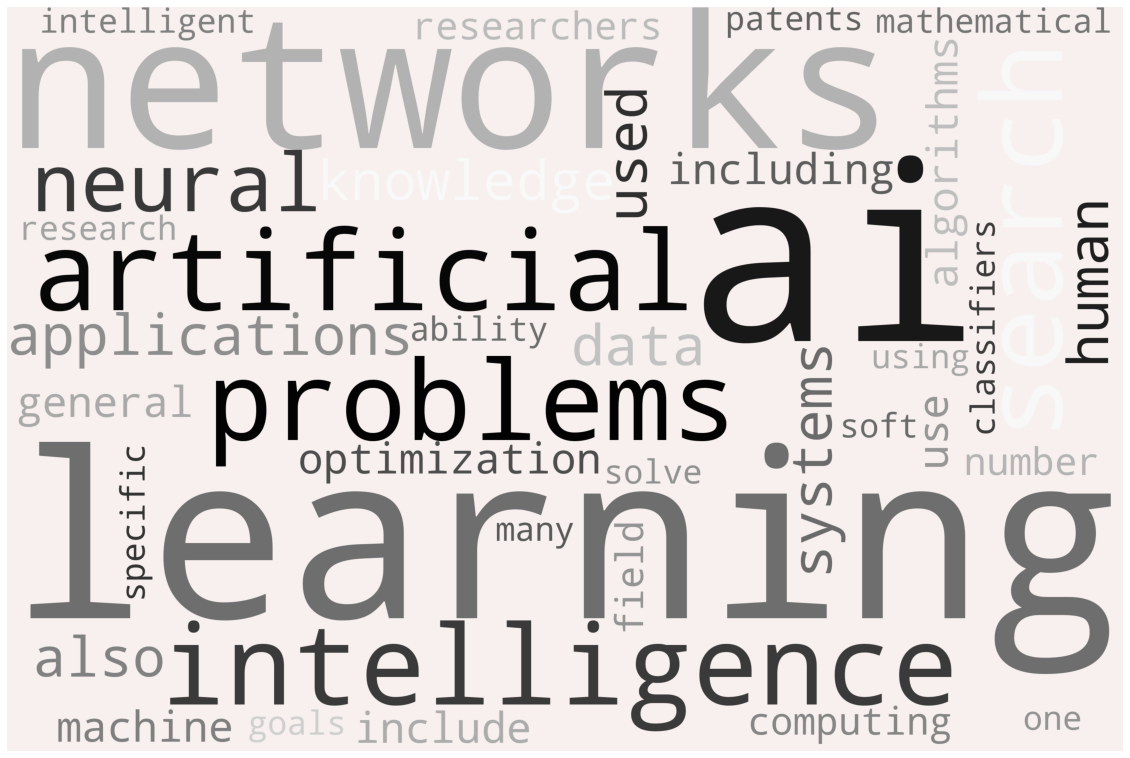

In [27]:
#bonus

from wordcloud import WordCloud
import matplotlib.pyplot as plt

cloud = heapq.nlargest(40, frequency, key=frequency.get)

def plot_cloud(wordcloud):
    plt.figure(figsize=(20, 15))
    plt.imshow(wordcloud) 
    plt.axis("off")
    plt.savefig('wordcloud.png');

wordcloud = WordCloud(width=3000, height=2000, random_state=1, 
                      background_color='#f7f0ee', colormap='binary_r', 
                      collocations=False, stopwords=english_stopwords).generate(' '.join(cloud))

plot_cloud(wordcloud)

[5] Language detection Using NLTK Python and print the probabilities and language name

+ Language detection use supervised machine learning algorithms based on character n-grams. These algorithms are trained on example texts in a known language.

+ The algorithm needs training data in all languages that are to be classified.

***
*languege code
https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes

ex) 'no' is Norwegian

In [42]:
from langdetect import detect_langs

phrase = ["Solen skinner i dag, fuglene synger, og det er sommer.",
          
          "Ní dhéanfaidh ach Dia breithiúnas orm.",
          
          "I domum et cuna matrem tuam in cochleare.",
          
          "Huffa, huffa meg, det finns poteter på badet. Stakkars, stakkars meg, det finns poteter på badet. "]

for w in phrase:
    print(w)
    print(detect_langs(w))
    print("\n")


Solen skinner i dag, fuglene synger, og det er sommer.
[no:0.8577876746868384, da:0.14221232531316166]


Ní dhéanfaidh ach Dia breithiúnas orm.
[cy:0.8571402181563859, en:0.14285750066816819]


I domum et cuna matrem tuam in cochleare.
[ro:0.9999947681462633]


Huffa, huffa meg, det finns poteter på badet. Stakkars, stakkars meg, det finns poteter på badet. 
[no:0.9999933512824473]




#[6]

Adaptive and predictive keyboards can address typing error problem, like  spurious mistouches and accidentally skipped keys.

Adaptive keyboards, collect user's touch location. Then use gaussian estimate, it can make partion, region of keys, which is user's own. It can reduce unintended user inputs.

Predictive keyboard, collect keys what user typed. usually typed keys make meaningful word. Use them, make database. When user type meaningless word, by mistake, it is considered to be error, so predictive keyboard can fix it.

For example, user type 'h', 'e', 'l', 'l'. then prediction is 'o'. they make meaningful word, 'hello'.

When user type 'hllo' or 'hqello' instead of 'hello'. they are meaningless word. predictive keyboard can suggest correct word, according to database.

To make database, decode a touch sequence for the intended input with token passing. For example, user type 'hello' then token passing is 'h-e-l-l-o'. They make strong connection. Connection can be explained by beam pruning.

Beam has width which represent probability. When user type mistake, predictive keyboard can explore beams, predict most probability connections and suggest solution.

For example, 'h-e' has larger beam width and probability than 'h-l'. When user type 'hllo', predictive keyboard can suggest 'hello', because of higher probability.  Also in case of 'h-e' and 'h-q', predictive keyboard can suggest 'hello', which is instead of 'hqello'.